In [11]:
## SYMBOLIC CALCULATION
import sympy as sym
import numpy as np
from sympy import *
import scipy
import matplotlib.pyplot as plt

## Lift and Drag

In [12]:
Ct = .1 # uiuc propeller testing at low advance ratio https://m-selig.ae.illinois.edu/props/propDB.html
rho = 1.23 #kg/m^2
D = .2 # meters This is the diameter of the propeller

eta = .4 # lift / power
Cq = 4*10**-3 # Coeficient of Torque https://arc.aiaa.org/doi/epdf/10.2514/6.2015-3296

k = Ct*rho*D**4 *(2*np.pi)
b = Cq*rho*D**5  *(2*np.pi)
k = 0.000196800   # Lift constant in newtons per radian**2
b = 9.892246947623543e-06 # torque per radian ^2

## Initial Conditions

In [13]:
# Constants
m = .6945 # Mass of the drone (kg)
g = -9.81  # Acceleration due to gravity (m/s^2)
l = 0.45/2. # Radius of rotor to COG
I_xx = 0.01349  # Moment of inertia about x-axis
I_yy = 0.01349  # Moment of inertia about y-axis
I_zz = .02681 # Moment of inertia about z-axis
I_m = 1.6817e-05 # Moment of inertia of the rotor

# Initial conditions
x0 = 0.0  # Initial x position
y0 = 0.0  # Initial y position
z0 = 1.0  # Initial z position (hovering at 2 meters)
vx0 = 0.0  # Initial velocity along x-axis
vy0 = 0.0  # Initial velocity along y-axis
vz0 = 0.0  # Initial velocity along z-axis
phi0 = 0.0  # Initial roll angle
theta0 = 0.0  # Initial pitch angle
psi0 = 0.0  # Initial yaw angle
omega_x0 = 0.0  # Initial angular velocity about x-axis
omega_y0 = 0.0  # Initial angular velocity about y-axis
omega_z0 = 0.0  # Initial angular velocity about z-axis


omega_m1_0 = 93.0310849898583  # Initial rotor angular velocity 1
omega_m2_0 = 93.0310849898583  # Initial rotor angular velocity 2
omega_m3_0 = 93.0310849898583  # Initial rotor angular velocity 3
omega_m4_0 = 93.0310849898583  # Initial rotor angular velocity 4


# Define torques here
tau_m1 = 0.0856152484823067
tau_m2 = 0.0856152484823067
tau_m3 = 0.0856152484823067
tau_m4 = 0.0856152484823067
powerUsedAlready = 0

In [14]:
import numpy as np
import matplotlib.pyplot as plt

motorEfficiency = 0.7

def derivs(state, K):
  x, y, z, vx, vy, vz, phi, theta, psi,omega_x,omega_y, omega_z, omega_m1, omega_m2, omega_m3, omega_m4, powerUsed = state

  F  = np.array([vx, vy, vz,
            k*(sin(phi)*sin(psi) + sin(theta)*cos(phi)*cos(psi))*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)/m,
           -k*(sin(phi)*cos(psi) - sin(psi)*sin(theta)*cos(phi))*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)/m,
           (g*m + k*(omega_m1**2 + omega_m2**2 + omega_m3**2 + omega_m4**2)*cos(phi)*cos(theta))/m,
            (omega_x),
            (omega_y),
            (omega_z),
           (-I_xx*I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*cos(phi)*tan(theta) - I_xx*I_zz*k*l*(omega_m1**2 - omega_m3**2)*sin(phi)*tan(theta) - I_yy*I_zz*k*l*(omega_m2**2 - omega_m4**2))/(I_xx*I_yy*I_zz),
           (I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*sin(phi) - I_zz*k*l*(omega_m1**2 - omega_m3**2)*cos(phi))/(I_yy*I_zz),
           (-I_yy*(tau_m1 - tau_m2 + tau_m3 - tau_m4)*cos(phi) - I_zz*k*l*(omega_m1**2 - omega_m3**2)*sin(phi))/(I_yy*I_zz*cos(theta)),
           (-b*omega_m1**2 + tau_m1)/I_m,
           (-b*omega_m2**2 + tau_m2)/I_m,
           (-b*omega_m3**2 + tau_m3)/I_m,
           (-b*omega_m4**2 + tau_m4)/I_m,
            (tau_m1*omega_m1 + tau_m2*omega_m2 + tau_m3*omega_m3 + tau_m4*omega_m4)/motorEfficiency]).astype(float)
  return F

In [15]:
t = np.linspace(0, 2*60, 1000)

state0 = [x0, y0, z0, vx0, vy0, vz0, phi0, theta0, psi0, omega_x0, omega_y0, omega_z0, omega_m1_0, omega_m2_0, omega_m3_0, omega_m4_0, powerUsedAlready]
state_out = scipy.integrate.odeint(derivs, state0, t)

x_out, y_out, z_out, vx_out, vy_out, vz_out, phi_out, theta_out, psi_out, omega_x_out, omega_y_out, omega_z_out, omega_m1_out, omega_m2_out, omega_m3_out, omega_m4_out, powerUsed = state_out.T

In [16]:
powerUsed[-1]

5461.631628332787

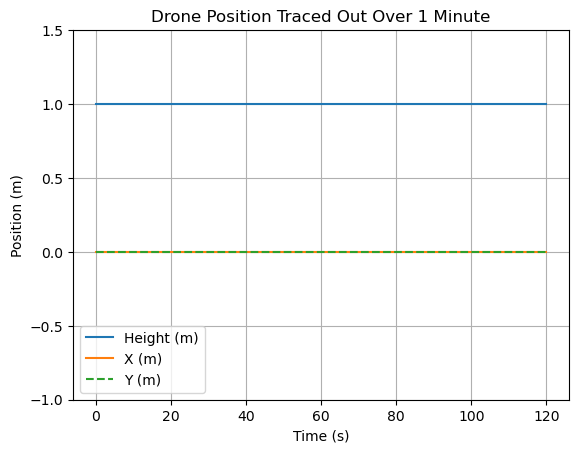

In [17]:
# Plot Z position over time
plt.plot( t, z_out, label='Height (m)')
plt.plot( t, x_out, label='X (m)')
plt.plot( t, y_out,linestyle='dashed', label='Y (m)')
plt.ylim(bottom=-1, top=1.5)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Drone Position Traced Out Over 1 Minute')
plt.grid(True)
plt.legend()
plt.show()

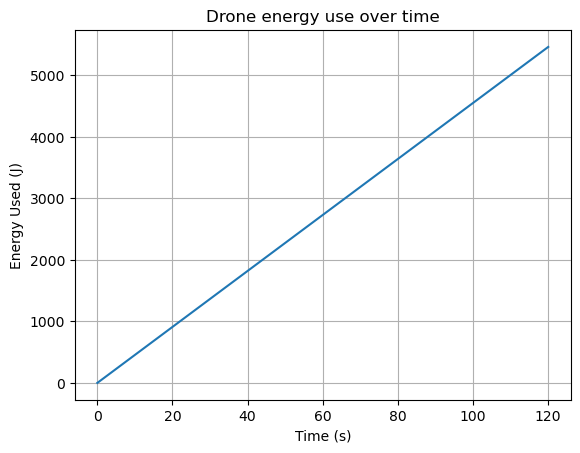

Total Power Used:  5461.631628332787 Jules


In [10]:
# Plot Z position over time
plt.plot( t, powerUsed)
plt.xlabel('Time (s)')
plt.ylabel('Energy Used (J)')
plt.title('Drone energy use over time')
plt.grid(True)
plt.show()
print("Total Power Used: ", powerUsed[-1], "Jules")